Импорт библеотек
---

In [58]:
#main
import pandas as pd
import numpy as np

#plot
from matplotlib import pyplot as plt
import seaborn as sns

#dop
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

#metric
from sklearn.metrics import classification_report

#
import random

Загрузка данных
---

In [8]:
PATH_TO_TRAIN = 'csv/train.csv'
PATH_TO_TASK = 'csv/test.csv'

train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
task = pd.read_csv(PATH_TO_TASK, index_col='PassengerId')

Создаём рабочие переменные
---

In [45]:
y_train_mean = train['Survived']
df = pd.concat([train.drop('Survived', axis=1), task])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Зависимость выживаемости от признаков
---

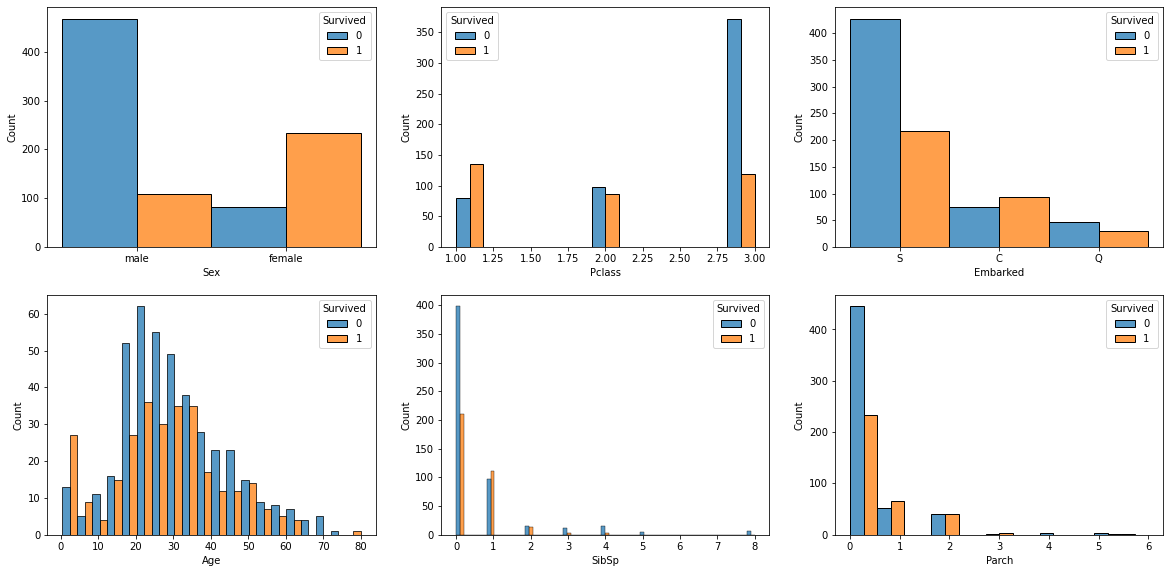

In [10]:
plt.figure(figsize = [20, 15])
plt.subplot(3, 3, 1)
sns.histplot(data = train, x = train['Sex'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 2)
sns.histplot(data = train, x = train['Pclass'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 3)
sns.histplot(data = train, x = train['Embarked'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 4)
sns.histplot(data = train, x = train['Age'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 5)
sns.histplot(data = train, x = train['SibSp'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 6)
sns.histplot(data = train, x = train['Parch'], hue = train['Survived'], multiple = 'dodge')
plt.plot();

In [46]:
df.replace({'male':0, 'female':1})

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


___
Заполням пропуски
---

In [77]:
def change_full(df):
    
    # заменяем пол
    res = df.replace({'male':0, 'female':1})
    
    # Заполнение пропусков признака 'Age'
    index_nan_age = list(df['Age'][df['Age'].isnull()].index)
    df['Kid'] = 0
    df.loc[df['Parch'] > 0, 'Kid'] = 1

    for i in index_nan_age:
        age_med = np.nanmedian(df['Age'][(df['Sex'] == df.loc[i]['Sex']) & (df["Pclass"] == df.loc[i]['Pclass']) &
                               (df["Embarked"] == df.loc[i]['Embarked']) & (df["Kid"] == df.loc[i]['Kid'])])
        res.loc[i, 'Age'] = age_med
        
    df.drop('Kid', axis=1, inplace=True)
    
    # 
    return res

In [78]:
df_change = change_full(df)
df_change.info()
df_change.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 144.8+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
